In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [19]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [20]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [21]:
# Combine the data into a single dataset
combined_mouse_data_df = pd.merge(mouse_metadata,study_results,how = 'outer',on =['Mouse ID'])
combined_mouse_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice.
tot_num_of_mice = len(combined_mouse_data_df["Mouse ID"].unique())
tot_num_of_mice

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_mouse_data_df.loc[combined_mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_rows

array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_id = combined_mouse_data_df[combined_mouse_data_df["Mouse ID"] == "g989"]
dup_mice_id                        

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_data_df[combined_mouse_data_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice in the clean DataFrame.
num_of_mice_clean = len(clean_df["Mouse ID"].unique())
num_of_mice_clean

248

In [27]:
###Summary Statistics
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_data =pd.DataFrame({"Mean":mean_data,"Median":median_data,"Variance":var_data,"Standard Deviation":std_data,"Standard Error" :sem_data})
summary_data

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
agg_data = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


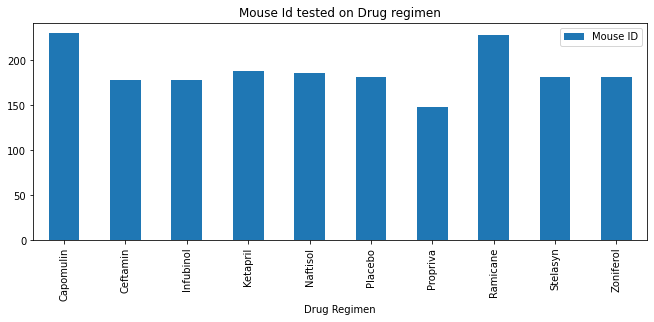

<Figure size 432x288 with 0 Axes>

In [29]:
### Bar and Pie Plots
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_regimen = pd.DataFrame(clean_df.groupby("Drug Regimen")["Mouse ID"].count())
mice_regimen

mice_regimen.plot(kind="bar",figsize=(11,4))
plt.title("Mouse Id tested on Drug regimen")
plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Mouse Id tested on Drug regimen')

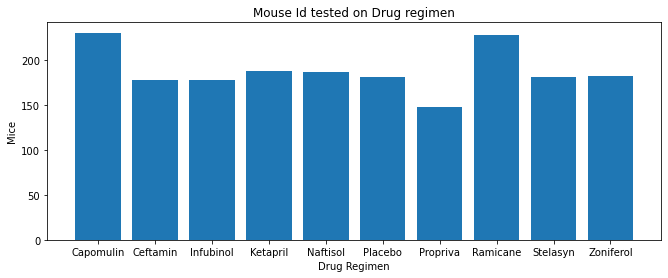

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_count = clean_df.groupby("Drug Regimen")["Mouse ID"].count().tolist()
drug_list = summary_data.index.tolist()

plt.figure(figsize=(11,4))
plt.bar(drug_list,drug_count,alpha=1.0,align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.title("Mouse Id tested on Drug regimen")

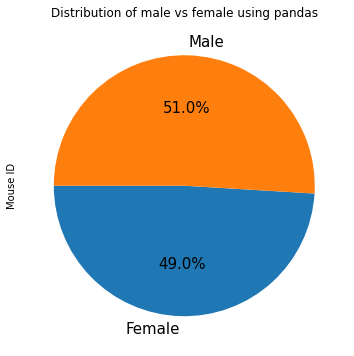

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_df.groupby("Sex")["Mouse ID"].count()
gender_df

gender_df.plot(kind="pie",figsize=(40,6), autopct='%1.1f%%',startangle=180, fontsize=15)
plt.title("Distribution of male vs female using pandas")
plt.show()


([<matplotlib.patches.Wedge at 0x7fc82e05c130>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153967, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

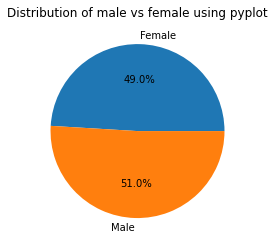

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels =["Female","Male"]
plt.title("Distribution of male vs female using pyplot")
plt.pie(gender_df,labels= labels,autopct='%1.1f%%',shadow= False)

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_greatest = clean_df.groupby("Mouse ID")["Timepoint"].max()
timepoint_greatest
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_tumor_timepoint_df = pd.merge(clean_df, timepoint_greatest, how="inner", on=["Mouse ID", "Timepoint"])
merge_tumor_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [48]:

# Put treatments into a list for for loop (and later for plot labels)
list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
for drug in list_of_drugs:
    volume_df = merge_tumor_timepoint_df.loc[merge_tumor_timepoint_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    quartiles = volume_df.quantile([0.25,0.5,0.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]
    print(f"The lower quartile is :{lowerq }")
    print(f"The Upper quartile is :{upperq }")
    print(f"The Interquartile is :{iqr}")
    print(f"The lower bound is :{lower_bound }")
    print(f"The upper bound is :{ upper_bound }")

The lower quartile is :32.37735684
The Upper quartile is :40.1592203
The Interquartile is :7.781863460000004
The lower bound is :20.70456164999999
The upper bound is :51.83201549
The lower quartile is :31.56046955
The Upper quartile is :40.65900627
The Interquartile is :9.098536719999998
The lower bound is :17.912664470000003
The upper bound is :54.30681135
The lower quartile is :54.04860769
The Upper quartile is :65.52574285
The Interquartile is :11.477135160000003
The lower bound is :36.83290494999999
The upper bound is :82.74144559000001
The lower quartile is :48.72207785
The Upper quartile is :64.29983003
The Interquartile is :15.577752179999997
The lower bound is :25.355449580000002
The upper bound is :87.66645829999999


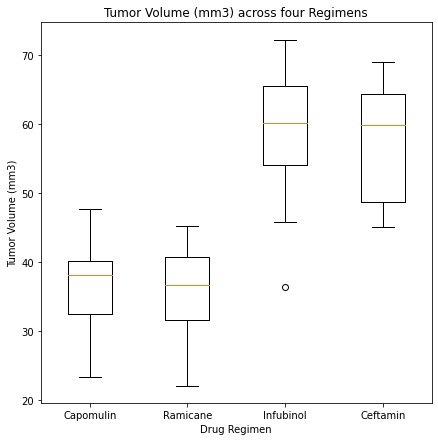

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.boxplot(tumor_vol)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(list_of_drugs) + 1),ticklabels=list_of_drugs)

plt.show()

In [ ]:
###Line and Scatter Plots
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
